In [3]:
from corgisim import scene
from corgisim import instrument
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import proper
import roman_preflight_proper
roman_preflight_proper.copy_here()

In [4]:
Vmag = 8
sptype = 'G0V'
cgi_mode = 'excam'
bandpass_corgisim = '4F'
bandpass_cgisim = '4'
cor_type = 'spc-wide'

host_star_properties = {'Vmag': Vmag, 'spectral_type': sptype, 'magtype':'vegamag'}
base_scene = scene.Scene(host_star_properties)

cases = ['2e-8']       
rootname = 'spc-wide_ni_' + cases[0]
dm1 = proper.prop_fits_read( roman_preflight_proper.lib_dir + '/examples/'+rootname+'_dm1_v.fits' )
dm2 = proper.prop_fits_read( roman_preflight_proper.lib_dir + '/examples/'+rootname+'_dm2_v.fits' )

proper_keywords = {'cor_type':cor_type, 'use_errors':2, 'polaxis':10, 'output_dim':201,\
                    'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2,'use_fpm':1, 'use_lyot_stop':1,  'use_field_stop':1 }
   
optics = instrument.CorgiOptics(cgi_mode, bandpass_corgisim, proper_keywords=proper_keywords, if_quiet=True, integrate_pixels=True)
sim_scene = optics.get_host_star_psf(base_scene)
image_star_corgi = sim_scene.host_star_image.data

CorgiOptics initialized with proper keywords.


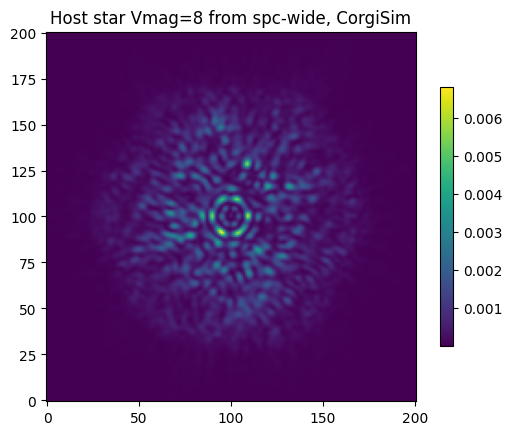

In [5]:
plt.imshow(image_star_corgi, origin='lower')
plt.title('Host star Vmag=8 from spc-wide, CorgiSim')

co = plt.colorbar(shrink=0.7)